In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist     #손글씨 데이터

### 데이터 로딩

In [3]:
data = mnist.load_data()

In [4]:
((X_train,y_train),(X_test,y_test)) = data

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 확인

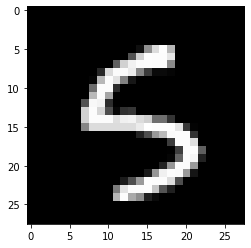

In [6]:
## imshow 이미지출력함수
plt.imshow(X_train[15000],cmap='gray')  ##6만장의 사진이 있으니..

In [6]:
y_train[15000]  ## 15000번째 데이터의 정답

5

In [7]:
X_train[15000].shape

(28, 28)

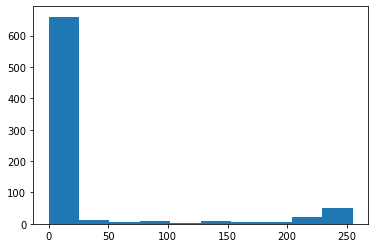

In [8]:
plt.hist(X_train[15000].reshape(-1))
plt.show()

### 데이터 셋 준비

##### 1. X데이터가 현재 2차원으로 되어있다. (28,28) -> 1차원으로 펴줘야한다.

In [9]:
X_train_reshape = X_train.reshape(60000, -1) ##6만장의사진을1차원으로 펴 버리겠다
X_test_reshape = X_test.reshape(10000, -1)

##### 2. 정답데이터 (0~9로 구성)  --> 확률 정보로 변경 시키기

In [10]:
import numpy as np
np.unique(y_train) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- 현재.. 문제와 답을 가지고 학습하는 지도학습이며 다중분류(10개중 어떤 것이 나올지 분류하는)문제이다
- 이를 확률문제로 바꿀 것! (e.g., 0일확률100퍼 1~9일 확률 각각0퍼 ... ==> [100,0,0,0,0,0,0,0,0,0])

In [11]:
import pandas as pd
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [12]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


### 모델생성
- input_dim : 입력하는 데이터의 모양
- 출력층의 퍼셉트론 갯수

In [13]:
import numpy as np
import tensorflow
seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [15]:
# 1. 모델 구조 생성
model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu')) ##뉴런추가(eg.아이리스실습이였으면 4개의특성으로 input_dim은 4쓰면 될거고..)

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [16]:
# 2. 모델 학습방법, 평가방법
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001), ##이렇게 클래스로 객체생성해서 쓸 수 있음 <기본매개변수로 쓰느냐vs뭔가 써보고싶으냐>
             metrics=["accuracy"]) ##분류에서 사용하는 가장 일반적인 방법 accuracy

#### 베스트 모델을 저장

In [17]:
import os
# 베스트 모델을 찾아서 저장
from tensorflow.keras.callbacks import ModelCheckpoint
# 학습이 더 이상 나아지지 않는다면 학습을 중단
from tensorflow.keras.callbacks import EarlyStopping

BEST_MODEL_DIR = ".\\model\\"   ## 모델을 저장하는 폴더

if not os.path.exists(BEST_MODEL_DIR):   ## 만일 위의 폴더가 존재하지 않으면
    os.mkdir(BEST_MODEL_DIR)              ## 이 이름의 폴더를 만들어라!
    
# eg. mnist_001-70.2246.hd5
BEST_MODEL_PATH = BEST_MODEL_DIR + "mnist_{epoch:03d}-{val_accuracy:.4f}.hd5"

# filepath : 베스트 모델을 저장할 경로
# monitor : 베스트 모델을 찾을 기준
# save_best_only : 베스트 모델만 저장
# verbose : 실행 과정을 출력 (0 : 출력 안함)
mc = ModelCheckpoint(filepath=BEST_MODEL_PATH,
                    monitor="val_accuracy",
                    save_best_only=True,
                    verbose=1)

# monitor : 중지할 기준
# patience : 학습이 나아지지 않더라도 진행하는 반복횟수
et = EarlyStopping(monitor="val_accuracy",
                  patience=5)

In [18]:
# 3. 모델 학습하기
history = model.fit(X_train_reshape,
                    y_train_one_hot,
                    validation_split=0.2,
                    epochs=2000,
                   callbacks=[mc, et])   ##fit 할때마다 callbacks 함수 호출하는 것
##배치사이즈 생략시 기본값 32

Train on 48000 samples, validate on 12000 samples
Epoch 1/2000
47200/48000 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.8833
Epoch 00001: val_accuracy improved from -inf to 0.94275, saving model to .\model\mnist_001-0.9427.hd5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\model\mnist_001-0.9427.hd5\assets
48000/48000 [==============================] - 5s 107us/sample - loss: 0.5487 - accuracy: 0.8843 - val_loss: 0.2092 - val_accuracy: 0.9427
Epoch 2/2000
47936/48000 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9482
Epoch 00002: val_accuracy improved from 0.94275 to 0.96042, saving model to .\model\mnist_002-0.9604.hd5
INFO:tensorflow:Assets written to: .\model\mnist_002-0.9604.hd5\assets
48000/48000 [==============================] - 4s 91us/sample - loss: 0.1828 - accuracy: 0.9483 - val_loss: 0.1429 - val_accuracy: 0.9604
Epoch 3/2000
47648/48000 [=============

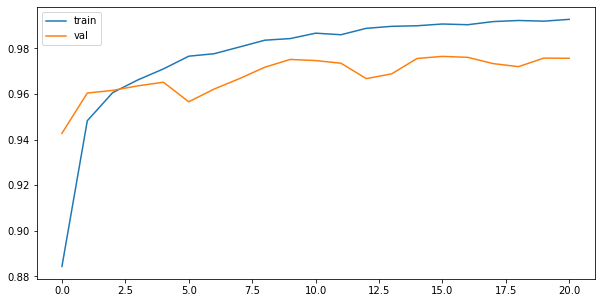

In [19]:
plt.figure(figsize=(10,5))     # 가로, 세로
plt.plot(history.history['accuracy'], label='train') # 훈련용 데이터로 평가한 점수
plt.plot(history.history['val_accuracy'], label='val') #검증용 데이터로 평가한 점수
plt.legend()   #범례
plt.show()

- 과소: val>train (훈련을 했는데 다 맞춤) 
- test가 더 낮게 나와야함

# 10.14

### 모델을 저장

In [20]:
import os

MODEL_DIR =".\\model\\"  ## \하나쓰면 줄넘김

# 해당 폴더가 없다면 폴더를 생성
if not os.path.exists(MODEL_DIR): ##해당되는 폴더가 없다면
    os.mkdir(MODEL_DIR)

In [31]:
# 모델 저장
path = MODEL_DIR + "mnist_model01.hd5"
model.save(path)

INFO:tensorflow:Assets written to: .\model\mnist_model01.hd5\assets


In [32]:
# 기본 모델 삭제
del model

In [33]:
## model.evaluate(X_test_reshape, y_test_one_hot)  ####삭제되고 없지

NameError: name 'model' is not defined

In [35]:
#저장한 모델 불러오기 ========================> 갱신된 w,b값 저장된 파일
from tensorflow.keras.models import load_model

model = load_model(path)

In [36]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1228 - accuracy: 0.9771


[0.12277748135440852, 0.9771]

In [42]:
path2 = BEST_MODEL_DIR + "mnist_016-0.9765.hd5"   ##이 모델이 저장된 모델 중 정확도 높아서 가져온 것

In [43]:
model1 = load_model(path2)

In [44]:
model1.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.1139 - accuracy: 0.9775


[0.11392544238452537, 0.9775]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
__________________________________________________

Total params = 딥러닝에서 학습하는 가중치의 갯수